# Short Course: Machine Learning for Exploration Geophysics

Hamburg, 10. - 12. March 2020

#### Computer Class 2.2: Random Forest

Table of Content:
- [Packages](#Packages)
- [Import and preprocess the dataset](#Import-and-preprocess-the-dataset)
- [Random forest](#Random-forest)
- [Visualize the results](#Visualize-the-results)

## Packages

Let's first import all the packages: 
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [pandas](https://pandas.pydata.org/) is a software library for data manipulation and analysis.
- [matplotlib](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python.
- [seaborn](https://seaborn.pydata.org/) is a statistical data visualization library based on matplotlib.
- [scikit-learn](https://scikit-learn.org/stable/) is a simple and efficient tools for predictive data analysis.

In [1]:
#!pip install pandas
#!pip install -U scikit-learn

#!python -m pip install -U pip
#!python -m pip install -U matplotlib

#!pip install pandas

#!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV

import warnings
warnings.filterwarnings('ignore')

print('Pandas:  ' + pd.__version__)
print('Numpy:   ' + np.__version__)
print('Sklearn: ' + sklearn.__version__)

Pandas:  0.24.2
Numpy:   1.17.4
Sklearn: 0.22.2.post1


## Import and preprocess the dataset

In [3]:
df = pd.read_csv('data/berlin_flat_price.csv')
df['Price'] = df['Price']/1000;  # in 1000s euro

X = df[['Size']].values
y = df['Price'].values    

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

#X_scaled.mean()
#X_scaled.std()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=False)

## Random forest

In [11]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators = 300, max_depth = 4, random_state=1)
reg.fit(X_train, y_train)



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

## Visualize the results

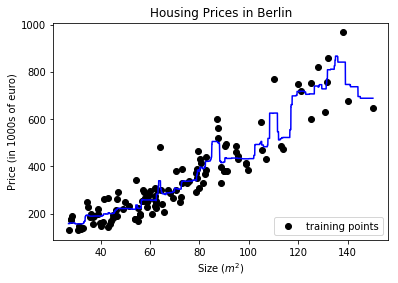

In [9]:
X_plot = np.arange(min(X),max(X),0.01)
X_plot = np.matrix(X_plot).T

fig = plt.figure()
plt.scatter(X_train, y_train, color='black', marker='o', label="training points")
plt.plot(X_plot, reg.predict(X_plot), color='blue')
plt.xlabel('Size ($m^2$)')
plt.ylabel('Price (in 1000s of euro)')
plt.title('Housing Prices in Berlin')
plt.legend(loc='lower right')
plt.show()
fig.tight_layout()